# Test of boundary condition in partially convective simulations 
- Case at $2.5 Ra_c$

Here we compare two PC simulations with different boundary conditions and  initializaitons.

In [2]:
#Paths for simulations and for the folder to store figures
FIGS_DIR = "/Volumes/LaCie/Report_Sims/figs/"
WORK_DIR = "/Volumes/LaCie/Simulations/mhd/"

PATH1 = WORK_DIR + "Nr15Ek5Ra7dS200Pm5_bs" # Simulation with boundary condition S
PATH2 = WORK_DIR + "Nr15Ek5Ra7dS200Pm5_bdsdr_init0" # Simulation with boundary condition ds/dr

FIGNAME1 = 'PC_butterfly_'

In [2]:
# Read simulations' data
os.chdir(PATH1)
ts1 = MagicTs(field='par', all=True, iplot=False)
os.chdir(PATH2)
ts2 = MagicTs(field='par', all=True, iplot=False)

(0.0, 1.0)

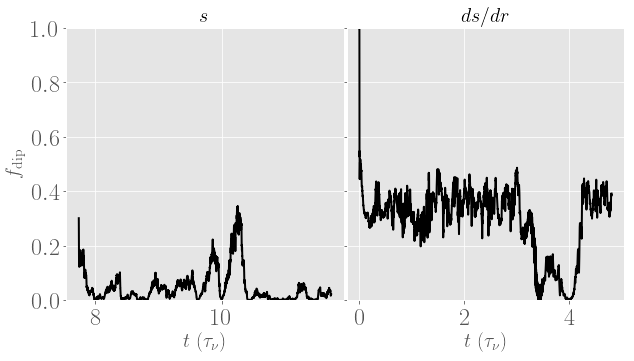

In [3]:
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True,  gridspec_kw={'wspace': 0.01})
ax[0].plot(ts1.time[it1], ts1.dip_cmb[it1], 'k')
ax[0].set_ylabel(r'$f_\mathrm{dip}$', fontsize=20)
ax[0].set_xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
ax[0].set_title(r'$s$', fontsize=20)

# PC results
ax[1].plot(ts2.time[it2], ts2.dip_cmb[it2], 'k')
ax[1].set_xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
ax[1].set_title(r'$ds/dr$', fontsize=20)
ax[1].set_ylim((0.,1.))
#ax[1].legend(fontsize=15)


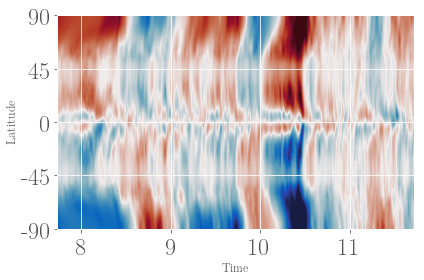

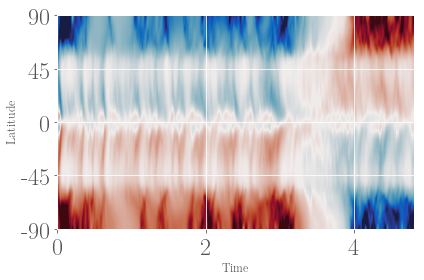

In [7]:
import cmocean

os.chdir(PATH1)
b1 = Butterfly(file='Br_R=C1_mov.16', step=1, iplot=False)
b2 = Butterfly(file='Br_R=C1_mov.17', step=1, iplot=False)
b3 = Butterfly(file='Br_R=C1_mov.18', step=1, iplot=False)
b4 = Butterfly(file='Br_R=C1_mov.19', step=1, iplot=False)
b5 = Butterfly(file='Br_R=C1_mov.20', step=1, iplot=False)
b6 = Butterfly(file='Br_R=C1_mov.21', step=1, iplot=False)
b = b1 + b2 + b3 + b4 + b5 + b6
b.plot(levels=33, cm=cmocean.cm.balance, cut=0.2)
os.chdir(FIGS_DIR)
plt.tight_layout()
plt.savefig(FIGNAME1+'bs.png', dpi=100, transparent=True)

os.chdir(PATH2)
b1 = Butterfly(file='Br_R=C1_mov.1', step=1, iplot=False)
b2 = Butterfly(file='Br_R=C1_mov.2', step=1, iplot=False)
b3 = Butterfly(file='Br_R=C1_mov.3', step=1, iplot=False)
b4 = Butterfly(file='Br_R=C1_mov.4', step=1, iplot=False)
b5 = Butterfly(file='Br_R=C1_mov.5', step=1, iplot=False)
b6 = Butterfly(file='Br_R=C1_mov.6', step=1, iplot=False)
b7 = Butterfly(file='Br_R=C1_mov.7', step=1, iplot=False)
b = b1 + b2 + b3 + b4 + b5 + b7
b.plot(levels=33, cm=cmocean.cm.balance, cut=0.35)
os.chdir(FIGS_DIR)
plt.tight_layout()
plt.savefig(FIGNAME1+'bdsdr.png', dpi=100, transparent=True)



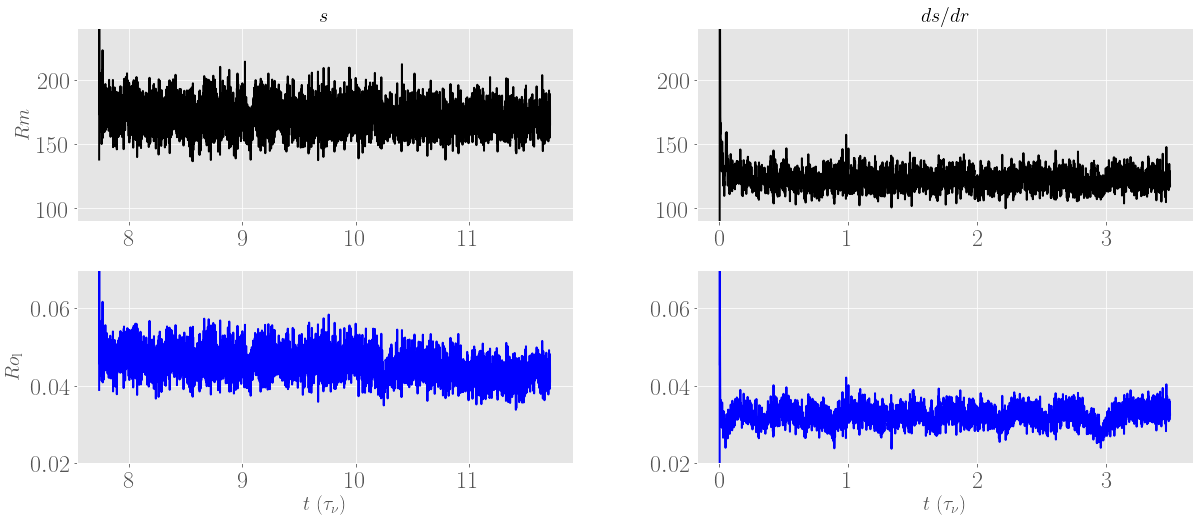

In [126]:
import matplotlib.gridspec as gridspec

it1 = ts1.time.argsort()
it2 = ts2.time.argsort()

# Rescaling to match Gastine et al. 2012, their scale of reference is not the outer radius but the convective shell gap. 
scale = 0.4

fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.25, hspace=0.25) # set the spacing between axes. 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharex=ax1)
ax4 = plt.subplot(gs[3], sharey=ax3, sharex=ax2)

ax1.plot(ts1.time[it1], ts1.rm[it1]*scale, 'k', label=r'S')
ax2.plot(ts2.time[it2], ts2.rm[it2]*scale, 'k', label=r'ds/dr')
ax3.plot(ts1.time[it1], ts1.rolc[it1]/scale, 'b')
ax4.plot(ts2.time[it2], ts2.rolc[it2]/scale, 'b')
ax1.set_ylabel(r'$Rm$', fontsize=20)
ax3.set_ylabel(r'$Ro_\mathrm{l}$', fontsize=20)
ax3.set_xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
ax4.set_xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
ax1.set_title(r'$s$', fontsize=20)
ax2.set_title(r'$ds/dr$', fontsize=20)
ax1.set_ylim((90,240))
ax3.set_ylim((0.020, 0.07))

#ax1.set_xticklabels([])
#ax2.set_yticklabels([])
#ax2.set_xticklabels([])
#ax4.set_yticklabels([])
#ax[0].legend(fontsize=15)
#plt.tight_layout()
plt.show()

In [12]:
# Read simulations' data
os.chdir(PATH1)
ts1 = MagicTs(field='e_mag_oc', all=True, iplot=False)
os.chdir(PATH2)
ts2 = MagicTs(field='e_mag_oc', all=True, iplot=False)

(10000.0, 300000.0)

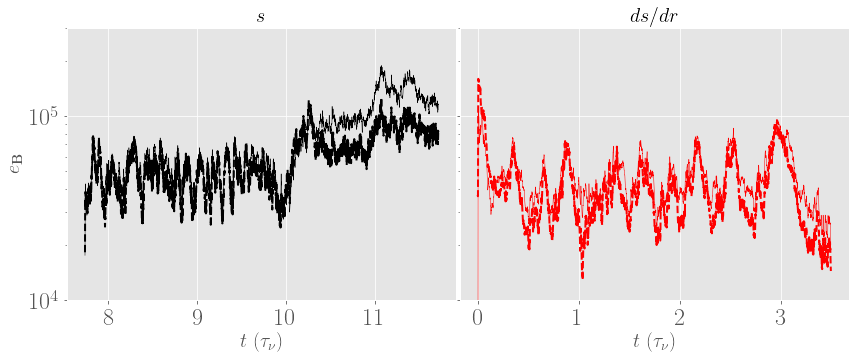

In [15]:
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()

fig, ax = plt.subplots(1,2, figsize=(14,5), sharey=True,  gridspec_kw={'wspace': 0.01})
ax[0].plot(ts1.time[it1], ts1.emagoc_tor[it1], 'k', linewidth=.5)
ax[0].plot(ts1.time[it1], ts1.emagoc_pol[it1], '--k')
ax[0].set_ylabel(r'$e_\mathbf{B}$', fontsize=20)
ax[0].set_xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
ax[0].set_title(r'$s$', fontsize=20)

# PC results
ax[1].plot(ts2.time[it2], ts2.emagoc_tor[it2], 'r', linewidth=.5)
ax[1].plot(ts2.time[it2], ts2.emagoc_pol[it2], '--r')
ax[1].set_xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
ax[1].set_title(r'$ds/dr$', fontsize=20)
ax[1].set_yscale('log')
#ax[1].legend(fontsize=15)
ax[1].set_ylim((1e4, 3e5))

In [13]:
# Read simulations' data
os.chdir(PATH1)
rad1 = MagicRadial(field='parR', iplot=False)
os.chdir(PATH2)
rad2 = MagicRadial(field='parR', iplot=False)

(0.05, 0.2)

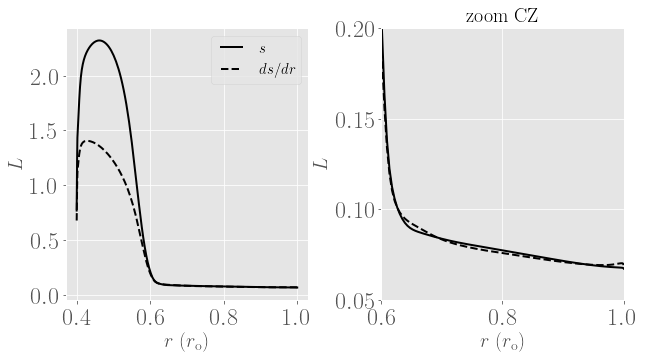

In [118]:
#Local flow length-scale (based on the mass-weighted velocity)
fig, ax = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'wspace': 0.3})
ax[0].plot(rad1.radius, rad1.dlV, 'k', label=r'$s$')
ax[0].plot(rad2.radius, rad2.dlV, '--k', label=r'$ds/dr$')
ax[0].set_ylabel(r'$L$', fontsize=20)
ax[0].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[0].set_xticks((0.4,0.6,0.8,1.))
ax[0].legend(fontsize=15)


# PC results
ax[1].plot(rad1.radius, rad1.dlV, 'k')
ax[1].plot(rad2.radius, rad2.dlV, '--k')
ax[1].set_ylabel(r'$L$', fontsize=20)
ax[1].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[1].set_title('zoom CZ', fontsize=20)
ax[1].set_xlim((0.6, 1.))
ax[1].set_ylim((0.05, .2))
#ax[1].legend(fontsize=15)

(0.06, 0.15)

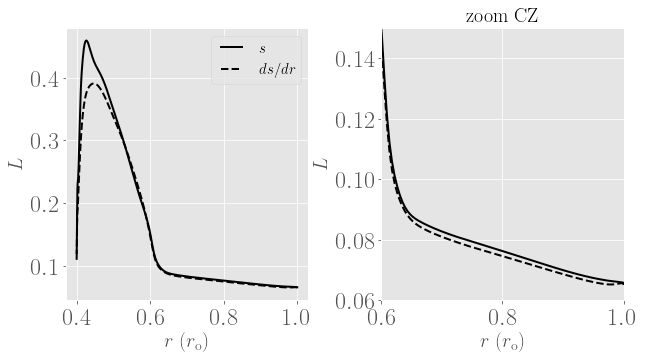

In [119]:
#Local flow length-scale based on the non-axisymmetric flow components (based on the RMS velocity)
fig, ax = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'wspace': 0.3})
ax[0].plot(rad1.radius, rad1.udlVc, 'k', label=r'$s$')
ax[0].plot(rad2.radius, rad2.udlVc, '--k', label=r'$ds/dr$')
ax[0].set_ylabel(r'$L$', fontsize=20)
ax[0].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[0].set_xticks((0.4,0.6,0.8,1.))
ax[0].legend(fontsize=15)


# PC results
ax[1].plot(rad1.radius, rad1.udlVc, 'k')
ax[1].plot(rad2.radius, rad2.udlVc, '--k')
ax[1].set_ylabel(r'$L$', fontsize=20)
ax[1].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[1].set_title('zoom CZ', fontsize=20)
ax[1].set_xlim((0.6, 1.))
ax[1].set_ylim((0.06, .15))
#ax[1].legend(fontsize=15)

In [25]:
# Read simulations' data
os.chdir(PATH1)
rad1 = MagicRadial(field='eMagR', iplot=False)
os.chdir(PATH2)
rad2 = MagicRadial(field='eMagR', iplot=False)

(0.4, 1.0)

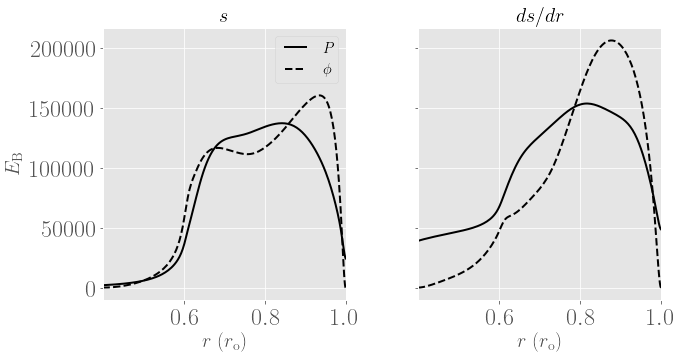

In [43]:
#Local flow length-scale (based on the mass-weighted velocity)
fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(10,5), gridspec_kw={'wspace': 0.3})
ax[0].plot(rad1.radius, rad1.emag_pol, 'k', label=r'$P$')
ax[0].plot(rad1.radius, rad1.emag_tor, '--k', label=r'$\phi$')
ax[0].set_ylabel(r'$E_\mathrm{B}$', fontsize=20)
ax[0].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[0].set_xticks((0.6,0.8,1.))
ax[0].set_xlim((0.4, 1.))
ax[0].legend(fontsize=15)
ax[0].set_title(r'$s$', fontsize=20)


#Local flow length-scale based on the non-axisymmetric flow components (based on the RMS velocity)
ax[1].plot(rad2.radius, rad2.emag_pol, 'k', label=r'$P$')
ax[1].plot(rad2.radius, rad2.emag_tor, '--k', label=r'$\phi$')
ax[1].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[1].set_title(r'$ds/dr$', fontsize=20)
ax[1].set_xlim((0.4, 1.))
#ax[1].set_yscale('log')
#ax[1].legend(fontsize=15)

11.715639
4.5877724


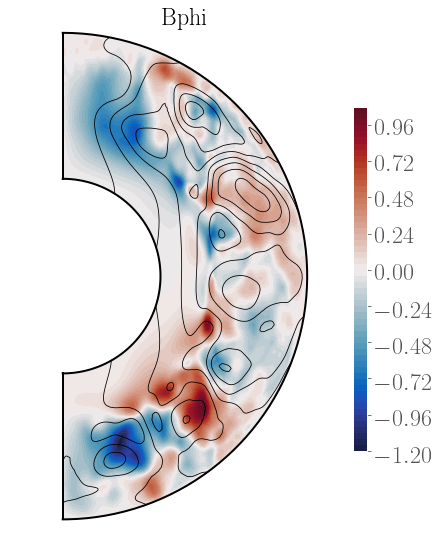

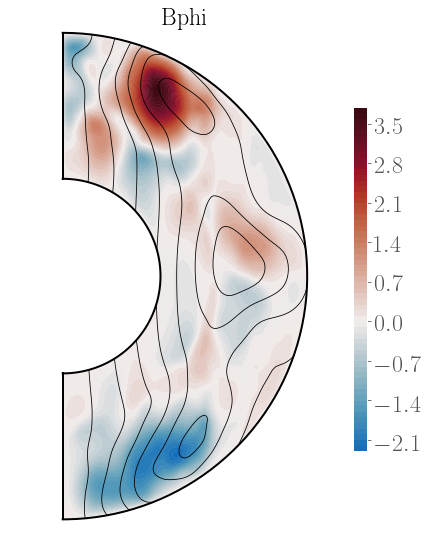

In [8]:
# Read simulations' data
os.chdir(PATH1)
s1 = Surf()
s1.avg(field='bp', cm=cmocean.cm.balance, pol=True, polLevels=8)
print(s1.gr.time)

os.chdir(PATH2)
s2 = Surf()
s2.avg(field='bp', cm=cmocean.cm.balance, pol=True, polLevels=8)
print(s2.gr.time)

In [1]:
# Read simulations' data
os.chdir(PATH1)
s1 = Surf()
s1.surf(field='br', r=.9, cbar=False)
print(s1.gr.time)

os.chdir(PATH2)
s2 = Surf()
s2.surf(field='br', r=.9, cbar=False)
print(s2.gr.time)

NameError: name 'PATH1' is not defined

In [2]:
# Read simulations' data
os.chdir(PATH1)
s1 = Surf()
s1.avg(field='vp')
print(s1.gr.time)

os.chdir(PATH2)
s2 = Surf()
s2.avg(field='vp')
print(s2.gr.time)

NameError: name 'PATH1' is not defined

11.715639
3.1325686


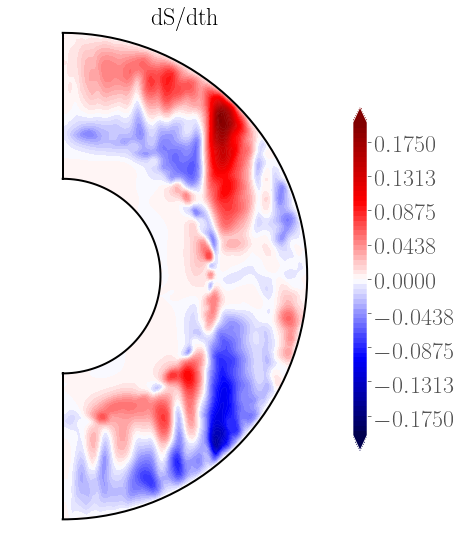

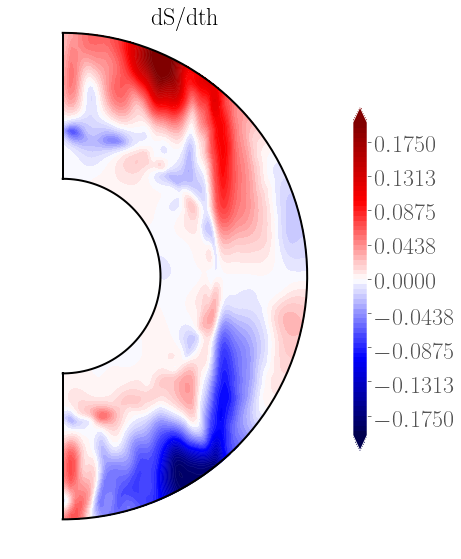

In [65]:
# Read simulations' data
os.chdir(PATH1)
s1 = Surf()
s1.avg(field='dentropy', vmin=-.20, vmax=0.20)
print(s1.gr.time)

os.chdir(PATH2)
s2 = Surf()
s2.avg(field='dentropy', vmin=-.20, vmax=0.20)
print(s2.gr.time)

BC: Fixed entropy
time of snapshot = 11.715639


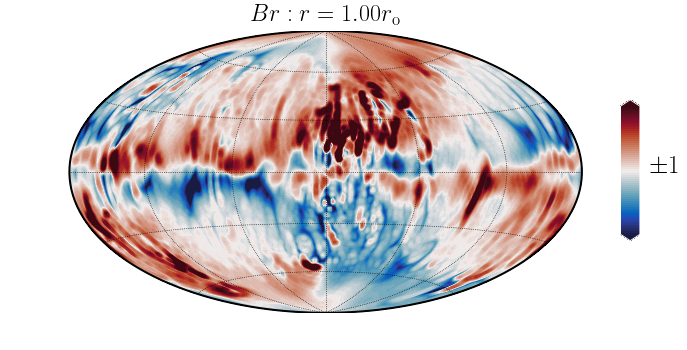

BC: ds/dr fixed
time of snapshot = 4.5877724


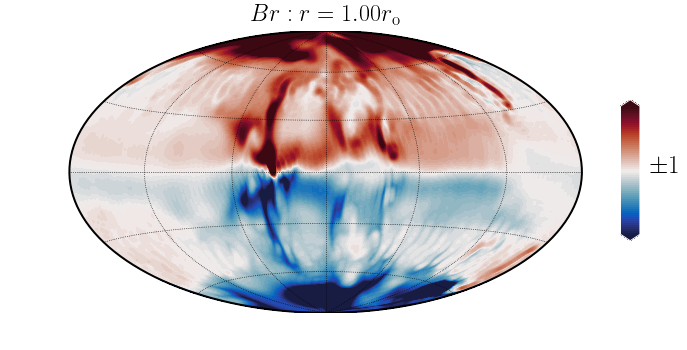

In [5]:
import cmocean

# Read simulations' data
os.chdir(PATH1)
s1 = Surf()
print('BC: Fixed entropy')
print('time of snapshot =', s1.gr.time)
s1.surf(field='br', r=1., cm=cmocean.cm.balance, vmin=-1., vmax=1.)
plt.show()

os.chdir(PATH2)
s2 = Surf()
print(r'BC: ds/dr fixed')
print('time of snapshot =', s2.gr.time)
s2.surf(field='br', r=1., cm=cmocean.cm.balance, vmin=-1., vmax=1.)
os.chdir(FIGS_DIR)
plt.savefig('PC_surfB_dsdr.png', dpi=100, transparent=True)


BC: Fixed entropy
time of snapshot = 11.715639


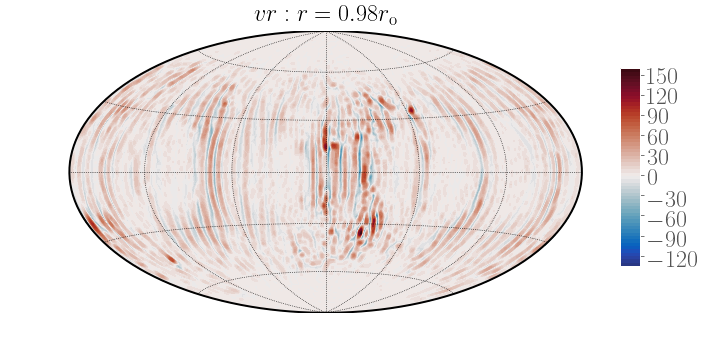

BC: ds/dr fixed
time of snapshot = 4.5877724


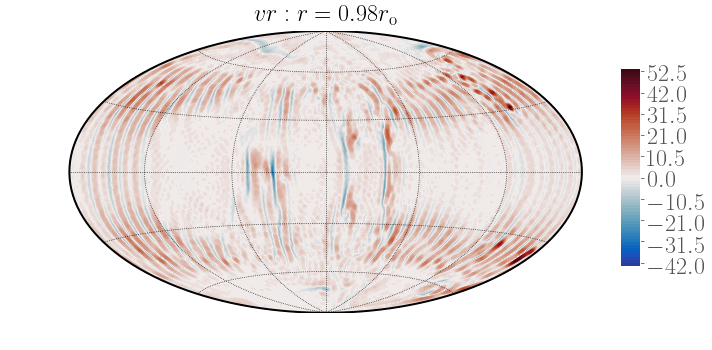

In [4]:
import cmocean

# Read simulations' data
os.chdir(PATH1)
s1 = Surf()
print('BC: Fixed entropy')
print('time of snapshot =', s1.gr.time)
s1.surf(field='vr', r=.98, cm=cmocean.cm.balance)#, vmin=-1., vmax=1.)
plt.show()

os.chdir(PATH2)
s2 = Surf()
print(r'BC: ds/dr fixed')
print('time of snapshot =', s2.gr.time)
s2.surf(field='vr', r=.98, cm=cmocean.cm.balance)#, vmin=-1., vmax=1.)


BC: ds/dr fixed
time of snapshot = 4.5877724


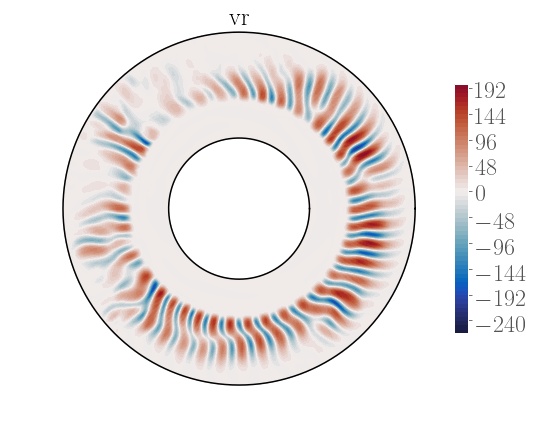

In [5]:
os.chdir(PATH2)
s2 = Surf()
print(r'BC: ds/dr fixed')
print('time of snapshot =', s2.gr.time)
s2.equat(field='vr', cm=cmocean.cm.balance)#, vmin=-1., vmax=1.)

In [20]:
os.chdir(PATH2)
ts2 = MagicTs(field='dipole', all=True, iplot=False)
rad2 = MagicRadial(field='parR', iplot=False)
it2 = ts2_pc.time.argsort()

In [24]:
scale=0.4
print(rad2.urol[rad2.radius > 0.6].mean()/scale, ts2.dip_l11.mean())

0.03998087396969696 0.38381349213866517
